Miro's ulfy-library allow us to generate dolfin-expressions by first creating a ulfy-expression in terms of ufl placeholder functions, and then inserting sympy-values in place of these. 

My main question is whether these expressions are affected by the degree of placheolder functions.

The results are seeminglty that the order of the placeholder is not taken into account when creating the ulfy-expression. Below is an example with a placeholder living in a $P^1$-space, which is later substituted by a 3rd order polynomial. The expression involves 2 orders of differentiation, which would normally lead to a the $P^1$-elements vanishing. However, the resultant expression, where the placeholder is replaced by a sympy-defined expression, still gives an exact representation. 

It does however come with 2 artifacts to be checked with Miro:
1. The "degree"-argument of the ulfy.Expression seems to be ignored: Attempting to represent the linear expression by degree-0 elements should give some error (especcially in the 'H1'-norm), but still seem to provide the exact result (as represented by an expression of sufficiently high degree.
2. Don't remember.

Total error between degrees 0.0 0.0
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.


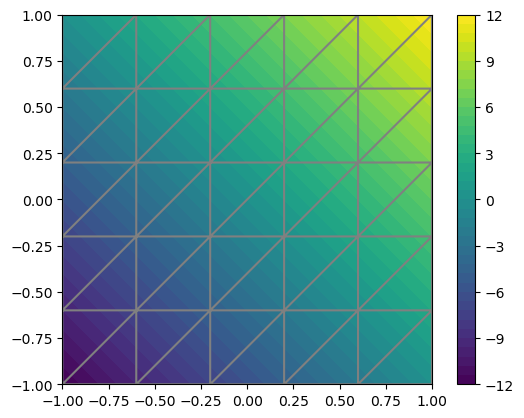

In [92]:
from dolfin import *
import ulfy
import sympy as sp

import matplotlib.pyplot as plt

mesh_ = UnitSquareMesh(1, 1)
V = FunctionSpace(mesh_, "CG", 1)
u_ = Function(V)


x, y = sp.symbols("x y")
u_sym = x**3 + y**3

mesh = RectangleMesh(Point(-1., -1), Point(1, 1), 5, 5)
V = FunctionSpace(mesh, "CG", 1)

f_low = ulfy.Expression(div(grad(u_)), subs={u_: u_sym}, degree=0)
f_high = ulfy.Expression(div(grad(u_)), subs={u_: u_sym}, degree=1)

tot1 = errornorm(fhigh, flow, "H1", mesh=mesh)
tot2 = errornorm(interpolate(fhigh, V), interpolate(flow, V), "H1")
print("Total error between degrees", tot1, tot2)

c = plot(flow, mesh=mesh)
plot(mesh)
plt.colorbar(c)
plt.show()